In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df = pd.read_csv("WELLCOME_APCspend2013_forThinkful.csv", encoding="latin")
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


In [56]:
df["Journal title"].value_counts()

PLoS One                                                      92
PLoS ONE                                                      62
Journal of Biological Chemistry                               48
Nucleic Acids Research                                        21
Proceedings of the National Academy of Sciences               19
Human Molecular Genetics                                      18
PLoS Neglected Tropical Diseases                              18
Nature Communications                                         17
Neuroimage                                                    15
PLoS Pathogens                                                15
PLoS Genetics                                                 15
PLOS ONE                                                      14
BMC Public Health                                             14
NeuroImage                                                    14
Brain                                                         14
Movement Disorders       

In [57]:
len(df["Journal title"].unique())

985

In [60]:
# Low hanging fruit: remove white space, convert to lower case, and remove special characters
df["Journal title"] = df["Journal title"].str.strip()
df["Journal title"] = df["Journal title"].str.lower()
df["Journal title"] = df["Journal title"].str.replace("[!@#$%^&*()?/.,;:]+", "")
df["Journal title"] = df["Journal title"].str.replace(r"\bbmj open\b", "bmj") # Replace spcific instances...repeat
len(df["Journal title"].unique())

890

In [61]:
df["Journal title"].value_counts()

plos one                                                              190
journal of biological chemistry                                        53
neuroimage                                                             29
nucleic acids research                                                 26
plos genetics                                                          24
plos pathogens                                                         24
proceedings of the national academy of sciences                        22
plos neglected tropical diseases                                       20
bmj                                                                    19
nature communications                                                  19
human molecular genetics                                               19
movement disorders                                                     15
brain                                                                  14
bmc public health                     

In [62]:
df["COST (£) charged to Wellcome (inc VAT when charged)"].head()

0       £0.00
1    £2381.04
2     £642.56
3     £669.64
4     £685.88
Name: COST (£) charged to Wellcome (inc VAT when charged), dtype: object

In [63]:
# Remove any non-digit characters from COST data and convert to float
df["Cost"] = df["COST (£) charged to Wellcome (inc VAT when charged)"].str.lower().str.replace("[$£]+", "")
df["Cost"] = df["Cost"].apply(lambda x: float(x))
df["Cost"] = df[df["Cost"] < 10000]["Cost"]
df["Cost"].head()

0       0.00
1    2381.04
2     642.56
3     669.64
4     685.88
Name: Cost, dtype: float64

In [64]:
df["Cost"].describe()

count    2077.000000
mean     1822.055908
std       767.698554
min         0.000000
25%      1268.700000
50%      1851.290000
75%      2302.130000
max      6000.000000
Name: Cost, dtype: float64

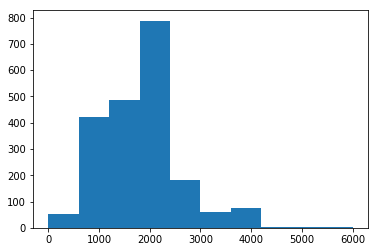

In [65]:
plt.hist(df["Cost"].dropna())
plt.show()

## Determine the five most common journals and the total articles for each

In [66]:
top_five = df["Journal title"].value_counts().head(5)
top_five

plos one                           190
journal of biological chemistry     53
neuroimage                          29
nucleic acids research              26
plos genetics                       24
Name: Journal title, dtype: int64

## Calculate the mean, median, and standard deviation of the open-access cost per article for each journal 

In [67]:
summary_df = pd.DataFrame(index = top_five.index, columns=["Mean", "Median", "Std"])
for i in range(len(top_five.index)):
    summary_df.loc[top_five.index[i]]["Mean"] = df[df["Journal title"] == top_five.index[i]]["Cost"].mean()
    summary_df.loc[top_five.index[i]]["Median"] = df[df["Journal title"] == top_five.index[i]]["Cost"].median()
    summary_df.loc[top_five.index[i]]["Std"] = df[df["Journal title"] == top_five.index[i]]["Cost"].std()
summary_df

,Mean,Median,Std
plos one,934.656,896.975,201.848
journal of biological chemistry,1423.59,1301.14,411.954
neuroimage,2215.17,2326.43,266.654
nucleic acids research,1149,852,442.94
plos genetics,1643.11,1712.73,153.367


## Subject Area

In [68]:
def subject_picker(title):
    title = str(title)
    if "psyc" in title:
        return "psychology"
    elif "bio" in title:
        return "biology"
    elif "chem" in title:
        return "chemistry"
    elif "neuro" in title:
        return "neuroscience"
    elif "viro" in title:
        return"virology"
    elif "phys" in title:
        return "physiology"
    else:
        return "other"
    
df["subject"] = df["Journal title"].apply(lambda x: subject_picker(x))
df["subject"].head()

0    psychology
1       biology
2     chemistry
3     chemistry
4     chemistry
Name: subject, dtype: object

In [69]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Cost,subject
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00,0.00,psychology
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,2381.04,biology
2,23043264 PMC3506128,ACS,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,642.56,chemistry
3,23438330 PMC3646402,ACS,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,669.64,chemistry
4,23438216 PMC3601604,ACS,j org chem,Regioselective opening of myo-inositol orthoes...,£685.88,685.88,chemistry


In [70]:
subject_mean = df[["subject", "Cost"]].groupby("subject").mean()
subject_median = df[["subject", "Cost"]].groupby("subject").median()
subject_std = df[["subject", "Cost"]].groupby("subject").std()

In [71]:
print("Mean by Subject")
print(subject_mean)

print("\nMedian by Subject")
print(subject_median)

print("\nStd by Subject")
print(subject_std)

Mean by Subject
                     Cost
subject                  
biology       1785.672446
chemistry     1722.507593
neuroscience  2011.560000
other         1791.891555
physiology    1721.244444
psychology    2236.749759
virology      1806.860000

Median by Subject
                  Cost
subject               
biology       1800.000
chemistry     1814.795
neuroscience  2040.000
other         1823.760
physiology    1882.840
psychology    2285.920
virology      1850.000

Std by Subject
                    Cost
subject                 
biology       661.939254
chemistry     709.489532
neuroscience  850.985071
other         792.454998
physiology    548.979278
psychology    569.790562
virology      388.748152
